### Data Fields
* datetime - hourly date + timestamp   
* season:
    -  1 = spring, 
    - 2 = summer, 
    - 3 = fall, 
    - 4 = winter  
* holiday - whether the day is considered a holiday 
* workingday - whether the day is neither a weekend nor holiday 
* weather:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
* temp - temperature in Celsius 
* atemp - "feels like" temperature in Celsius 
* humidity - relative humidity 
* windspeed - wind speed 
* casual - number of non-registered user rentals initiated 
* registered - number of registered user rentals initiated 
* count - number of total rentals 

#### Imports 

In [656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

sns.set()

#### Data imports

In [657]:
df = pd.read_csv('../data/train.csv')

#### Dataframe structure analysis

In [658]:
display(df.head(), df.describe(), df.info(), df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


None

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- 0 Humidity ?
- 0 Windspeed ? (Finally not an error)
- Remove registered
- Remove casual

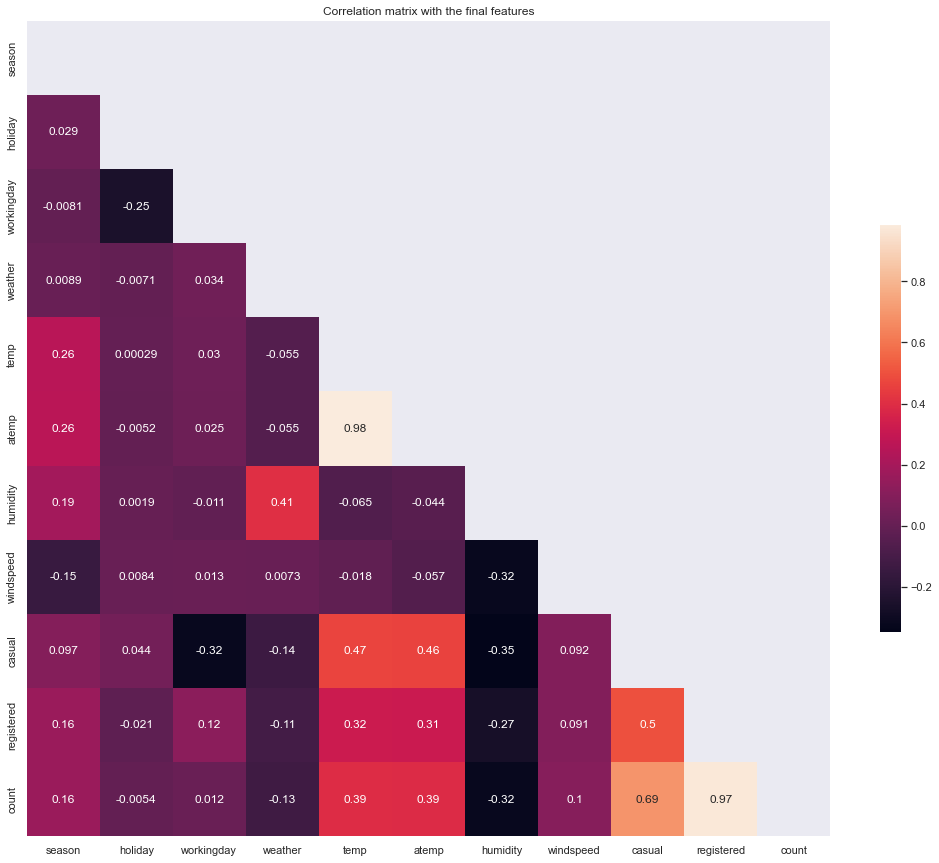

In [659]:
cor = df.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
plt.figure(figsize=(18,15))
sns.heatmap(cor, annot=True, cbar_kws={'shrink':0.5}, mask=mask).set_title('Correlation matrix with the final features')
plt.show()

- atemp and temp are too correlated

In [660]:
df[df['windspeed'] == 0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132


Not an error

In [661]:
df[df['humidity'] == 0.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11


Impossible but for now i don't touch this 

#### Date encoding : 
- Get an int for date (number of day since the first day)
- Separate hours

In [662]:
df['datetime'] = pd.to_datetime(df['datetime'])
df["date"] = (df["datetime"] - df["datetime"].min()).dt.days
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

I tried to make a feature for each years, months, days, but it's less relevant than the day number itself

In [663]:
df['years']=pd.DatetimeIndex(df['datetime']).year
df['months']=pd.DatetimeIndex(df['datetime']).month
df['days']=pd.DatetimeIndex(df['datetime']).day
df['hours']=pd.DatetimeIndex(df['datetime']).hour

Quick Analysis of the dataset with hist plot

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'years'}>,
        <AxesSubplot:title={'center':'months'}>,
        <AxesSubplot:title={'center':'days'}>],
       [<AxesSubplot:title={'center':'hours'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

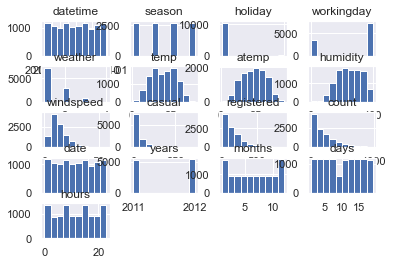

In [664]:
df.hist()

Text(0.5, 1.0, 'Count mean by hours')

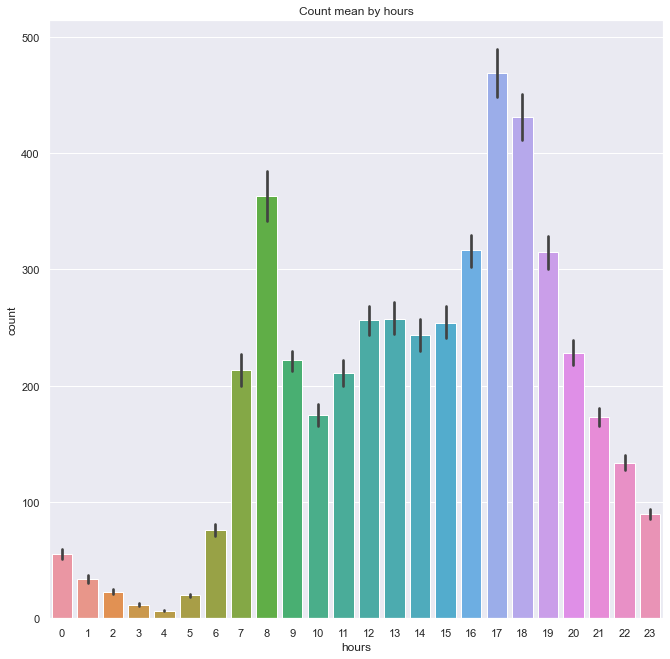

In [665]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.barplot(x="hours", y="count", data=df).set_title('Count mean by hours')

Text(0.5, 1.0, 'Count mean by temps')

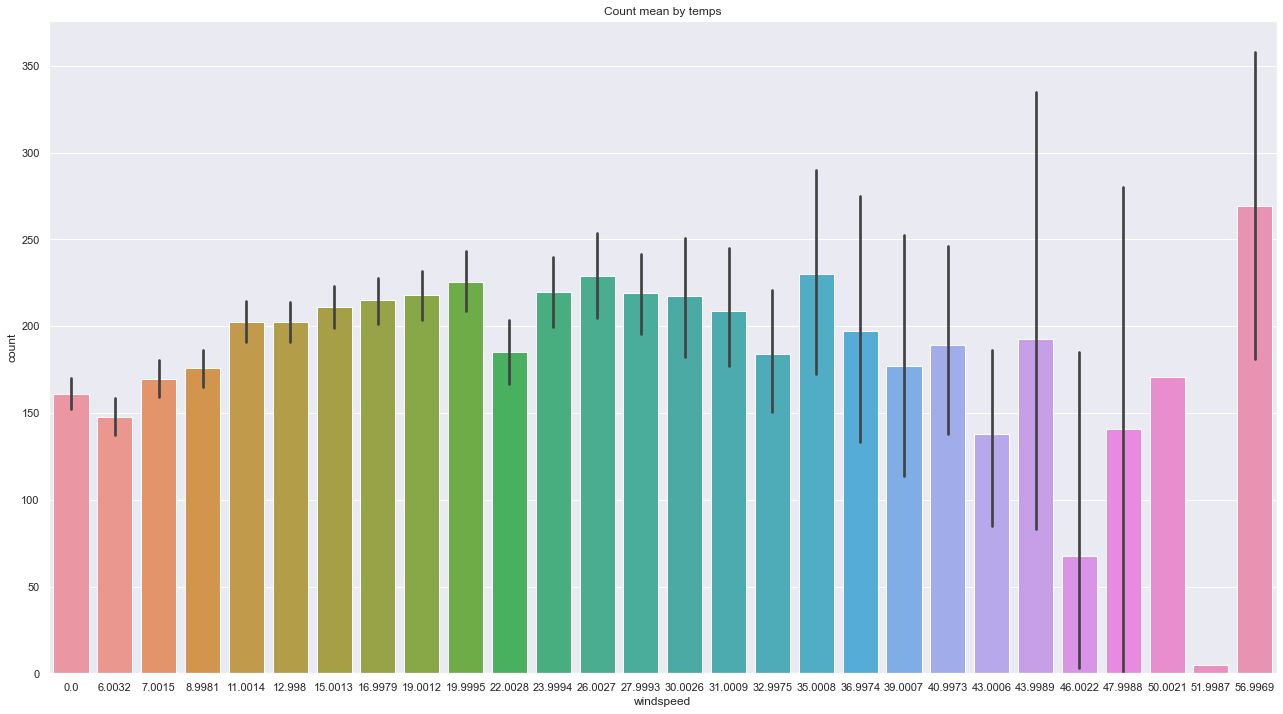

In [666]:
fig, ax = plt.subplots(figsize=(22, 12))
sns.barplot(x="windspeed", y="count", data=df).set_title('Count mean by temps')

I tried to compute the humidex (Indice de confort) but it was too correlated to temp to be relevant

In [667]:
# NOT USED
# calcul du point de rosée  (formule de Heinrich Gustav Magnus-Tetens)
# df['alpha'] = np.log(df['humidity'] / 100.0) + (17.27 * df['atemp']) / (237.3 + df['atemp'])
# df['rosee'] = (237.3 * df['alpha']) / (17.27 - df['alpha'])

#calcul de l'humidex 
# df['humidex'] = df['atemp'] + 0.5555 * (6.11 * np.exp(5417.753 * (1 / 273.16 - 1 / (273.15 + df['rosee']))) - 10)

In [668]:
df['is_night'] = 0
df.loc[(df['hours'] >= 20) | (df['hours'] <= 8), 'is_night'] = 1

In [669]:
df['hours_sin'] = np.sin(df['hours'])
df['hours_cos'] = np.cos(df['hours'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,years,months,days,hours,is_night,hours_sin,hours_cos
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,1,1,0,1,0.000000,1.000000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0,2011,1,1,1,1,0.841471,0.540302
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0,2011,1,1,2,1,0.909297,-0.416147
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0,2011,1,1,3,1,0.141120,-0.989992
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0,2011,1,1,4,1,-0.756802,-0.653644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,718,2012,12,19,19,0,0.149877,0.988705
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,718,2012,12,19,20,1,0.912945,0.408082
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,718,2012,12,19,21,1,0.836656,-0.547729
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,718,2012,12,19,22,1,-0.008851,-0.999961


In [670]:
df[df['is_night'] == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,years,months,days,hours,is_night,hours_sin,hours_cos
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,1,1,0,1,0.000000,1.000000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0,2011,1,1,1,1,0.841471,0.540302
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0,2011,1,1,2,1,0.909297,-0.416147
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0,2011,1,1,3,1,0.141120,-0.989992
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0,2011,1,1,4,1,-0.756802,-0.653644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678,718,2012,12,19,8,1,0.989358,-0.145500
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,718,2012,12,19,20,1,0.912945,0.408082
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,718,2012,12,19,21,1,0.836656,-0.547729
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,718,2012,12,19,22,1,-0.008851,-0.999961


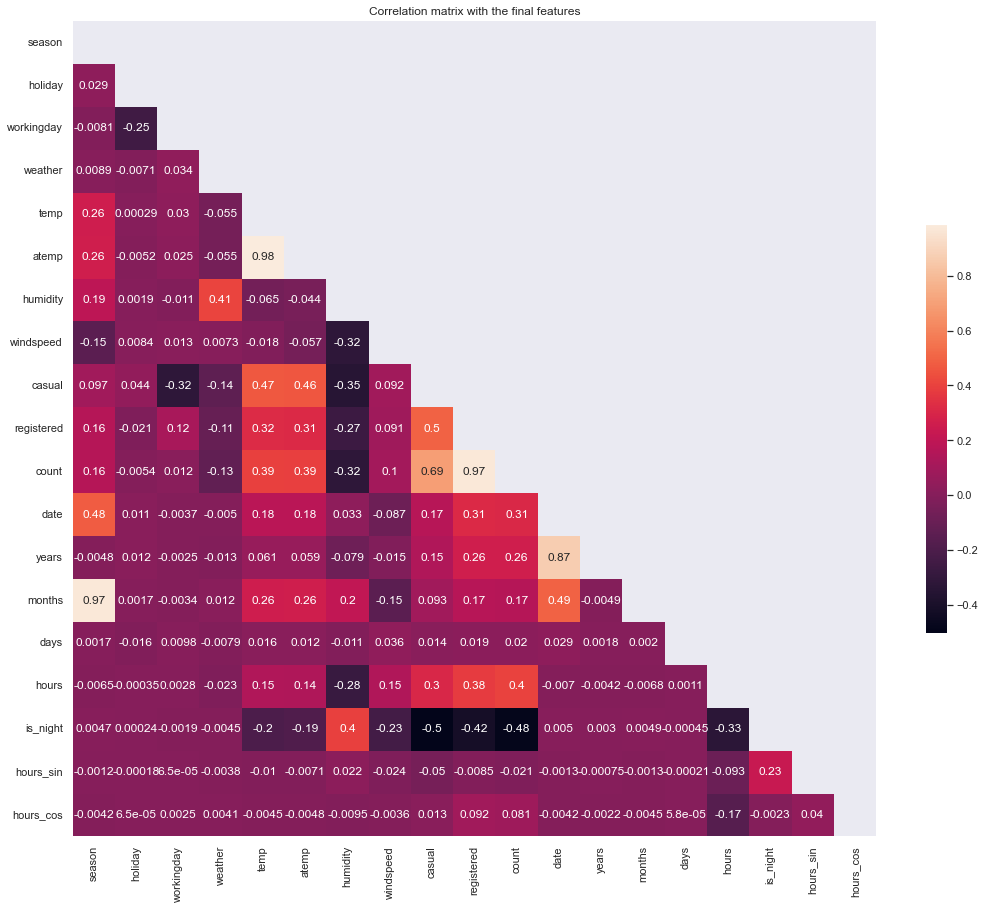

In [671]:
cor = df.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
plt.figure(figsize=(18,15))
sns.heatmap(cor, annot=True, cbar_kws={'shrink':0.5}, mask=mask).set_title('Correlation matrix with the final features')
plt.show()

In [672]:
unregistered_by_month = df.groupby(['months','years'])['casual'].sum().reset_index()
weekly_reg = df.groupby(['days','years'])['registered'].last().reset_index()
total_user = df.groupby(['months','years'])['count'].sum().reset_index()
user_by_season = df.groupby(['season'])['count'].sum().reset_index()

In [673]:
user_by_season

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


In [674]:
weekly_reg[weekly_reg['years'] == 2012]['registered']

1     116
3      44
5      93
7      91
9      69
11     93
13    116
15    144
17     48
19     76
21     60
23     76
25    115
27    123
29    108
31     29
33     41
35     80
37     84
Name: registered, dtype: int64

In [675]:
unregistered_by_month[unregistered_by_month['years'] == 2012]['casual']

1      5244
3      5521
5     17146
7     27584
9     25420
11    28974
13    24802
15    28290
17    27590
19    20928
21    15198
23     9621
Name: casual, dtype: int64

In [676]:
total_user[total_user['years'] == 2011]['count']

0     23552
2     32844
4     38735
6     50517
8     79713
10    89776
12    92848
14    83296
16    79104
18    79522
20    70889
22    61183
Name: count, dtype: int64

In [677]:
total_user[total_user['years'] == 2012]['count']

1      56332
3      66269
5      94766
7     116885
9     120434
11    130957
13    121769
15    130220
17    133425
19    127912
21    105551
23     98977
Name: count, dtype: int64

In [678]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,years,months,days,hours,is_night,hours_sin,hours_cos
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,1,1,0,1,0.000000,1.000000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0,2011,1,1,1,1,0.841471,0.540302
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0,2011,1,1,2,1,0.909297,-0.416147
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0,2011,1,1,3,1,0.141120,-0.989992
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0,2011,1,1,4,1,-0.756802,-0.653644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,718,2012,12,19,19,0,0.149877,0.988705
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,718,2012,12,19,20,1,0.912945,0.408082
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,718,2012,12,19,21,1,0.836656,-0.547729
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,718,2012,12,19,22,1,-0.008851,-0.999961


In [679]:
from skyfield import api
from skyfield.api import wgs84, N, W

bluffton = wgs84.latlon(38* N, -77 * W)

ts = api.load.timescale()
eph = api.load('de421.bsp')

from skyfield import almanac

t0 = ts.ut1(2011, 1, 1)
t1 = ts.ut1(2012, 12, 19)
f = almanac.risings_and_settings(eph, eph['Mars'], bluffton)
t, y = almanac.find_discrete(t0, t1, f)

sun_or_set = []

for ti, yi in zip(t, y):
    sun_or_set.append([ti.utc_iso(), 'Rise' if yi else 'Set'])

sun_or_set

[['2011-01-01T02:45:39Z', 'Rise'],
 ['2011-01-01T12:16:04Z', 'Set'],
 ['2011-01-02T02:44:38Z', 'Rise'],
 ['2011-01-02T12:15:52Z', 'Set'],
 ['2011-01-03T02:43:37Z', 'Rise'],
 ['2011-01-03T12:15:41Z', 'Set'],
 ['2011-01-04T02:42:34Z', 'Rise'],
 ['2011-01-04T12:15:31Z', 'Set'],
 ['2011-01-05T02:41:30Z', 'Rise'],
 ['2011-01-05T12:15:21Z', 'Set'],
 ['2011-01-06T02:40:25Z', 'Rise'],
 ['2011-01-06T12:15:12Z', 'Set'],
 ['2011-01-07T02:39:19Z', 'Rise'],
 ['2011-01-07T12:15:04Z', 'Set'],
 ['2011-01-08T02:38:12Z', 'Rise'],
 ['2011-01-08T12:14:57Z', 'Set'],
 ['2011-01-09T02:37:03Z', 'Rise'],
 ['2011-01-09T12:14:50Z', 'Set'],
 ['2011-01-10T02:35:54Z', 'Rise'],
 ['2011-01-10T12:14:43Z', 'Set'],
 ['2011-01-11T02:34:43Z', 'Rise'],
 ['2011-01-11T12:14:38Z', 'Set'],
 ['2011-01-12T02:33:32Z', 'Rise'],
 ['2011-01-12T12:14:33Z', 'Set'],
 ['2011-01-13T02:32:19Z', 'Rise'],
 ['2011-01-13T12:14:28Z', 'Set'],
 ['2011-01-14T02:31:05Z', 'Rise'],
 ['2011-01-14T12:14:24Z', 'Set'],
 ['2011-01-15T02:29:50Z', 'Rise'],

In [680]:
sun_or_set = pd.DataFrame(sun_or_set)
sun_or_set

,0,1
0,2011-01-01T02:45:39Z,Rise
1,2011-01-01T12:16:04Z,Set
2,2011-01-02T02:44:38Z,Rise
3,2011-01-02T12:15:52Z,Set
4,2011-01-03T02:43:37Z,Rise
...,...,...
1433,2012-12-16T13:35:06Z,Set
1434,2012-12-17T04:00:23Z,Rise
1435,2012-12-17T13:34:59Z,Set
1436,2012-12-18T03:59:15Z,Rise


In [681]:
sun_or_set = sun_or_set.set_axis(['datetime', 'set_rise'], axis=1)
sun_or_set

,datetime,set_rise
0,2011-01-01T02:45:39Z,Rise
1,2011-01-01T12:16:04Z,Set
2,2011-01-02T02:44:38Z,Rise
3,2011-01-02T12:15:52Z,Set
4,2011-01-03T02:43:37Z,Rise
...,...,...
1433,2012-12-16T13:35:06Z,Set
1434,2012-12-17T04:00:23Z,Rise
1435,2012-12-17T13:34:59Z,Set
1436,2012-12-18T03:59:15Z,Rise


In [682]:
sun_or_set['datetime'] = pd.to_datetime(sun_or_set['datetime']).dt.tz_convert(tz='US/Central')
sun_or_set['datetime'] = pd.to_datetime(sun_or_set['datetime']).dt.tz_localize(None)
sun_or_set

,datetime,set_rise
0,2010-12-31 20:45:39,Rise
1,2011-01-01 06:16:04,Set
2,2011-01-01 20:44:38,Rise
3,2011-01-02 06:15:52,Set
4,2011-01-02 20:43:37,Rise
...,...,...
1433,2012-12-16 07:35:06,Set
1434,2012-12-16 22:00:23,Rise
1435,2012-12-17 07:34:59,Set
1436,2012-12-17 21:59:15,Rise


In [683]:
import datetime
sun_or_set['datetime'] = sun_or_set['datetime'].dt.round('H')

In [684]:
sun_or_set

,datetime,set_rise
0,2010-12-31 21:00:00,Rise
1,2011-01-01 06:00:00,Set
2,2011-01-01 21:00:00,Rise
3,2011-01-02 06:00:00,Set
4,2011-01-02 21:00:00,Rise
...,...,...
1433,2012-12-16 08:00:00,Set
1434,2012-12-16 22:00:00,Rise
1435,2012-12-17 08:00:00,Set
1436,2012-12-17 22:00:00,Rise


In [685]:
df = df.merge(sun_or_set, how='left')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,years,months,days,hours,is_night,hours_sin,hours_cos,set_rise
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,16,0,2011,1,1,0,1,0.000000,1.000000,NaN
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,40,0,2011,1,1,1,1,0.841471,0.540302,NaN
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,32,0,2011,1,1,2,1,0.909297,-0.416147,NaN
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,13,0,2011,1,1,3,1,0.141120,-0.989992,NaN
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,1,0,2011,1,1,4,1,-0.756802,-0.653644,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,336,718,2012,12,19,19,0,0.149877,0.988705,NaN
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,241,718,2012,12,19,20,1,0.912945,0.408082,NaN
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,168,718,2012,12,19,21,1,0.836656,-0.547729,NaN
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,129,718,2012,12,19,22,1,-0.008851,-0.999961,NaN


In [686]:
df[df['set_rise'].notnull()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,years,months,days,hours,is_night,hours_sin,hours_cos,set_rise
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,...,2,0,2011,1,1,6,1,-0.279415,0.960170,Set
21,2011-01-01 21:00:00,1,0,0,2,16.40,20.455,87,12.9980,3,...,34,0,2011,1,1,21,1,0.836656,-0.547729,Rise
29,2011-01-02 06:00:00,1,0,0,3,17.22,21.210,77,19.9995,0,...,2,1,2011,1,2,6,1,-0.279415,0.960170,Set
44,2011-01-02 21:00:00,1,0,0,1,10.66,11.365,44,22.0028,11,...,31,1,2011,1,2,21,1,0.836656,-0.547729,Rise
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,...,30,2,2011,1,3,6,1,-0.279415,0.960170,Set
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,2012-12-16 08:00:00,4,0,0,2,14.76,17.425,87,8.9981,12,...,88,715,2012,12,16,8,1,0.989358,-0.145500,Set
10812,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,...,89,715,2012,12,16,22,1,-0.008851,-0.999961,Rise
10822,2012-12-17 08:00:00,4,0,1,2,15.58,19.695,87,7.0015,10,...,592,716,2012,12,17,8,1,0.989358,-0.145500,Set
10836,2012-12-17 22:00:00,4,0,1,2,17.22,21.210,94,8.9981,5,...,54,716,2012,12,17,22,1,-0.008851,-0.999961,Rise


In [687]:
df['set_rise'] = df['set_rise'].fillna('No info')

In [688]:
df['set_rise']

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10881    No info
10882    No info
10883    No info
10884    No info
10885    No info
Name: set_rise, Length: 10886, dtype: object

In [689]:
i = 0
set = False
rise = False

while 1:

    if i == len(df):
        break

    if df['set_rise'][i] == 'Set':
        set = True
        rise = False
    
    if df['set_rise'][i] == 'Rise':
        rise = True
        set = False

    if df['set_rise'][i] == 'No info':
        if set == True: 
            df['set_rise'][i] = 1

    if df['set_rise'][i] == 'No info':
        if rise == True: 
            df['set_rise'][i] = 0

    i += 1


display(df[df['set_rise'] == 0], df[df['set_rise'] == 1], df[df['set_rise'] == 'No info'])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,years,months,days,hours,is_night,hours_sin,hours_cos,set_rise
22,2011-01-01 22:00:00,1,0,0,2,16.40,20.455,94,15.0013,11,...,28,0,2011,1,1,22,1,-0.008851,-0.999961,0
23,2011-01-01 23:00:00,1,0,0,2,18.86,22.725,88,19.9995,15,...,39,0,2011,1,1,23,1,-0.846220,-0.532833,0
24,2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4,...,17,1,2011,1,2,0,1,0.000000,1.000000,0
25,2011-01-02 01:00:00,1,0,0,2,18.04,21.970,94,16.9979,1,...,17,1,2011,1,2,1,1,0.841471,0.540302,0
26,2011-01-02 02:00:00,1,0,0,2,17.22,21.210,100,19.0012,1,...,9,1,2011,1,2,2,1,0.909297,-0.416147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,2012-12-18 03:00:00,4,0,1,1,17.22,21.210,88,12.9980,0,...,5,717,2012,12,18,3,1,0.141120,-0.989992,0
10842,2012-12-18 04:00:00,4,0,1,1,17.22,21.210,82,11.0014,3,...,8,717,2012,12,18,4,1,-0.756802,-0.653644,0
10843,2012-12-18 05:00:00,4,0,1,1,15.58,19.695,87,6.0032,0,...,36,717,2012,12,18,5,1,-0.958924,0.283662,0
10844,2012-12-18 06:00:00,4,0,1,1,14.76,17.425,93,11.0014,1,...,118,717,2012,12,18,6,1,-0.279415,0.960170,0


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,years,months,days,hours,is_night,hours_sin,hours_cos,set_rise
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,...,3,0,2011,1,1,7,1,0.656987,0.753902,1
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,...,8,0,2011,1,1,8,1,0.989358,-0.145500,1
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,...,14,0,2011,1,1,9,0,0.412118,-0.911130,1
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,...,36,0,2011,1,1,10,0,-0.544021,-0.839072,1
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,...,56,0,2011,1,1,11,0,-0.999990,0.004426,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,336,718,2012,12,19,19,0,0.149877,0.988705,1
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,241,718,2012,12,19,20,1,0.912945,0.408082,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,168,718,2012,12,19,21,1,0.836656,-0.547729,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,129,718,2012,12,19,22,1,-0.008851,-0.999961,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,date,years,months,days,hours,is_night,hours_sin,hours_cos,set_rise
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,16,0,2011,1,1,0,1,0.000000,1.000000,No info
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,40,0,2011,1,1,1,1,0.841471,0.540302,No info
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,32,0,2011,1,1,2,1,0.909297,-0.416147,No info
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,13,0,2011,1,1,3,1,0.141120,-0.989992,No info
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,1,0,2011,1,1,4,1,-0.756802,-0.653644,No info
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,...,1,0,2011,1,1,5,1,-0.958924,0.283662,No info


In [690]:
df.loc[df['set_rise'] == 'No info', 'set_rise'] = 1

In [691]:
df = df.drop('is_night', axis=1)
df = df.rename(columns={'set_rise':'is_night'})

In [692]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,years,months,days,hours,hours_sin,hours_cos,is_night
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,2011,1,1,0,0.000000,1.000000,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0,2011,1,1,1,0.841471,0.540302,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0,2011,1,1,2,0.909297,-0.416147,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0,2011,1,1,3,0.141120,-0.989992,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0,2011,1,1,4,-0.756802,-0.653644,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,718,2012,12,19,19,0.149877,0.988705,1
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,718,2012,12,19,20,0.912945,0.408082,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,718,2012,12,19,21,0.836656,-0.547729,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,718,2012,12,19,22,-0.008851,-0.999961,1


Dropping Casual, registered, atemp (atemp because the score is better with temp)

In [693]:
df_cas = df.drop(['casual', 'atemp', 'hours_sin', 'hours_cos'], axis=1)
df_reg = df.drop(['registered', 'atemp', 'hours_sin', 'hours_cos'], axis=1)
df = df.drop(['casual', 'registered', 'atemp', 'hours_sin', 'hours_cos'], axis=1)

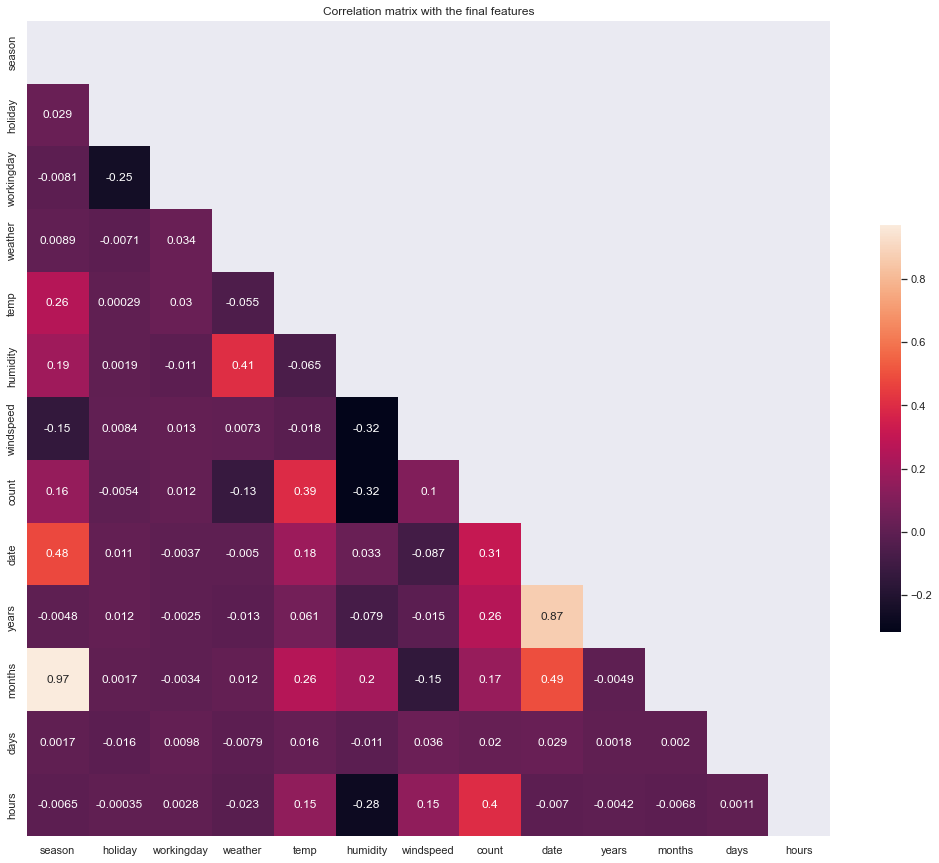

In [694]:
cor = df.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
plt.figure(figsize=(18,15))
sns.heatmap(cor, annot=True, cbar_kws={'shrink':0.5}, mask=mask).set_title('Correlation matrix with the final features')
plt.show()

khi2

#### Checking correlation after modification

#### Splitting train / test by date  (2011 : 2012-08)

In [695]:
train_df_cas = df_cas[df_cas['datetime'] <= '2012-07-30']
test_df_cas = df_cas[df_cas['datetime'] >= '2012-08-01']

train_df_reg = df_reg[df_reg['datetime'] <= '2012-07-30']
test_df_reg = df_reg[df_reg['datetime'] >= '2012-08-01']

train_df = df[df['datetime'] <= '2012-07-30']
test_df = df[df['datetime'] >= '2012-08-01']

In [696]:
train_df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,date,years,months,days,hours,is_night
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,16,0,2011,1,1,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,40,0,2011,1,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,32,0,2011,1,1,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,13,0,2011,1,1,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,1,0,2011,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,2012-07-19 19:00:00,3,0,1,1,34.44,44,16.9979,533,565,2012,7,19,19,1
8603,2012-07-19 20:00:00,3,0,1,1,33.62,49,11.0014,505,565,2012,7,19,20,1
8604,2012-07-19 21:00:00,3,0,1,3,27.06,89,16.9979,332,565,2012,7,19,21,1
8605,2012-07-19 22:00:00,3,0,1,3,27.06,89,16.9979,68,565,2012,7,19,22,1


In [697]:
test_df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,date,years,months,days,hours,is_night
8607,2012-08-01 00:00:00,3,0,1,1,27.88,79,11.0014,47,578,2012,8,1,0,Rise
8608,2012-08-01 01:00:00,3,0,1,1,27.06,83,6.0032,33,578,2012,8,1,1,0
8609,2012-08-01 02:00:00,3,0,1,1,26.24,83,7.0015,13,578,2012,8,1,2,0
8610,2012-08-01 03:00:00,3,0,1,1,26.24,83,7.0015,7,578,2012,8,1,3,0
8611,2012-08-01 04:00:00,3,0,1,2,26.24,78,8.9981,4,578,2012,8,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,336,718,2012,12,19,19,1
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,241,718,2012,12,19,20,1
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,168,718,2012,12,19,21,1
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,129,718,2012,12,19,22,1


Dropping datetime original column

In [698]:
train_df_cas = train_df_cas.drop('datetime', axis=1)
test_df_cas = test_df_cas.drop('datetime', axis=1)

train_df_reg = train_df_reg.drop('datetime', axis=1)
test_df_reg = test_df_reg.drop('datetime', axis=1)

train_df = train_df.drop('datetime', axis=1)
test_df = test_df.drop('datetime', axis=1)

#### Export to csv

In [699]:
train_df_cas.to_csv('../data/cleaned_cas_train.csv', index=False)
test_df_cas.to_csv('../data/cleaned_cas_test.csv', index=False)

train_df_reg.to_csv('../data/cleaned_reg_train.csv', index=False)
test_df_reg.to_csv('../data/cleaned_reg_test.csv', index=False)

train_df.to_csv('../data/cleaned_train.csv', index=False)
test_df.to_csv('../data/cleaned_test.csv', index=False)